# Preparation

In [1]:
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

# Tasks
In this quest, you will be working on a classic CNN task of classifying cats and dogs images. You can access the training and testing sets [here](https://drive.google.com/drive/folders/19EL9VyYCVqxStG-O1jJtBQGa8JZpLDvO?usp=sharing) and get acquainted with the folder structure.

Make sure to change your Colab runtime to GPU to ensure adequate performance.

Specify 4 directories for cats and dogs images of training and testing sets respectively. You will be using them to build and train the network.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_dir = '/content/drive/MyDrive/Wild/deep_learning/training_set'
valid_dir = '/content/drive/MyDrive/Wild/deep_learning/test_set'

Initiate `ImageDataGenerator` (check the [documentation](https://keras.io/api/preprocessing/image/)). Your image generator needs to convert the image from RGB into number arrays in order for the neural network to proces them (in other words, normalize the values using the `rescale` parameter).

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
valid_datagen = ImageDataGenerator(rescale=1/255.)


Apply the `ImageDataGenerator` you defined above using `flow_from_directory` to convert both training and testing data.

In [8]:
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',  # car binaire : chat ou chien
    seed=42
)

valid_data = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    seed=42
)

Found 8098 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


Build a convolutional neural network based on the [VGG16](https://neurohive.io/en/popular-networks/vgg16/) architecture.

In [9]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Charger VGG16 sans la tête (top) et figer ses poids
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
vgg_base.trainable = False  # Figer les poids pour le transfer learning

# Créer un nouveau modèle séquentiel
model = Sequential()

# Ajouter la base VGG16
model.add(vgg_base)

# Ajouter GlobalAveragePooling2D pour réduire les dimensions spatiales
model.add(GlobalAveragePooling2D())

# Ajouter une couche dense pour la classification binaire
model.add(Dense(1, activation='sigmoid'))  # Pour classification binaire


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Compile it using the optimizer and error metrics of your choice.

In [10]:
# Compiler le modèle
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [11]:
# Afficher un résumé du modèle
model.build(input_shape=(None, 224, 224, 3))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,715,201 (56.13 MB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Fit the model using `fit_generator`. This time, feel free to define the parameters according to your understanding and experiment with them to find a better solution. Be patient though, the training will take a while.

In [12]:
history= model.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data)
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
254/254 ━━━━━━━━━━━━━━━━━━━━ 4851s 19s/step - accuracy: 0.6966 - loss: 0.6319 - val_accuracy: 0.8435 - val_loss: 0.5038
Epoch 2/5
254/254 ━━━━━━━━━━━━━━━━━━━━ 92s 233ms/step - accuracy: 0.8451 - loss: 0.4743 - val_accuracy: 0.8585 - val_loss: 0.4242
Epoch 3/5
254/254 ━━━━━━━━━━━━━━━━━━━━ 58s 226ms/step - accuracy: 0.8642 - loss: 0.4036 - val_accuracy: 0.8740 - val_loss: 0.3783
Epoch 4/5
254/254 ━━━━━━━━━━━━━━━━━━━━ 58s 227ms/step - accuracy: 0.8647 - loss: 0.3709 - val_accuracy: 0.8780 - val_loss: 0.3482
Epoch 5/5
254/254 ━━━━━━━━━━━━━━━━━━━━ 83s 232ms/step - accuracy: 0.8841 - loss: 0.3359 - val_accuracy: 0.8825 - val_loss: 0.3272


Plot the model accuracy.

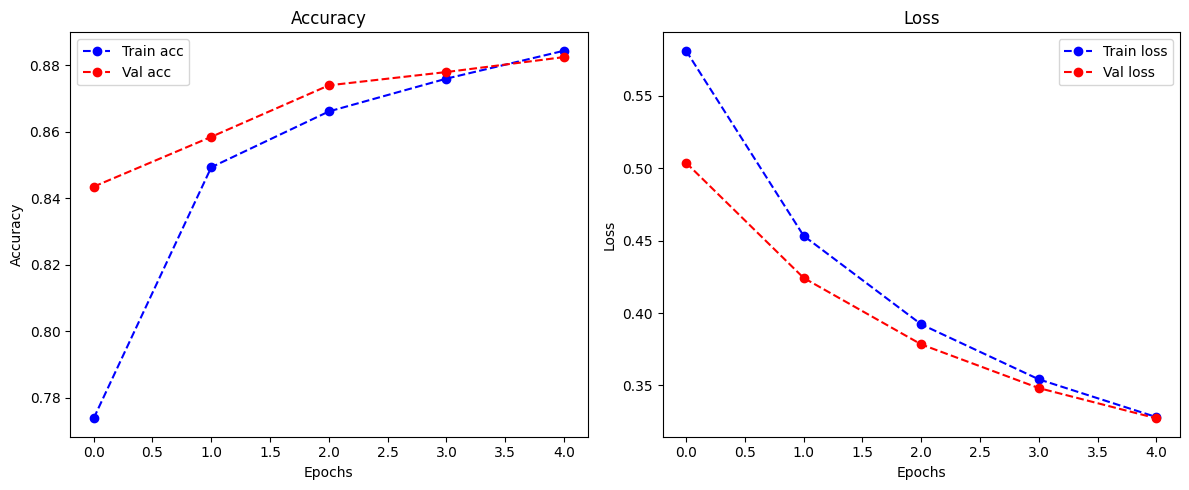

In [13]:
import matplotlib.pyplot as plt

def plot_accuracy_loss(history):
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], 'bo--', label='Train acc')
    plt.plot(history.history['val_accuracy'], 'ro--', label='Val acc')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], 'bo--', label='Train loss')
    plt.plot(history.history['val_loss'], 'ro--', label='Val loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_accuracy_loss(history)
